In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#读取学习data
train = np.loadtxt('click.csv', delimiter=',', dtype='int', skiprows=1)
train_x = train[:,0]
train_y = train[:,1]
print(train)
print(train_x)
print(train_y)

[[235 591]
 [216 539]
 [148 413]
 [ 35 310]
 [ 85 308]
 [204 519]
 [ 49 325]
 [ 25 332]
 [173 498]
 [191 498]
 [134 392]
 [ 99 334]
 [117 385]
 [112 387]
 [162 425]
 [272 659]
 [159 400]
 [159 427]
 [ 59 319]
 [198 522]]
[235 216 148  35  85 204  49  25 173 191 134  99 117 112 162 272 159 159
  59 198]
[591 539 413 310 308 519 325 332 498 498 392 334 385 387 425 659 400 427
 319 522]


In [4]:
#标准化
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x-mu)/sigma
train_z = standardize(train_x)
print(train_z)

[ 1.39433428  1.11069026  0.09554325 -1.59139223 -0.8449606   0.93154667
 -1.38239138 -1.74067856  0.46875906  0.73747445 -0.11345761 -0.63595975
 -0.36724436 -0.44188752  0.3045441   1.94669369  0.25975821  0.25975821
 -1.23310505  0.84197488]


In [6]:
#参数初始化
theta0 = np.random.rand()
theta1 = np.random.rand()

In [7]:
#预测函数
def f(x):
    return theta0 + theta1 * x

In [8]:
#目的函数
def E(x,y):
    return 0.5 * np.sum((y-f(x))**2)

In [9]:
#学习率
ETA = 1e-3

In [10]:
#误差的差分
diff =1

In [11]:
#更新回数
count = 0

In [12]:
#误差的差分小于0.01结束循环
error = E(train_z, train_y)

1回:theta0 = 9.292,theta1 = 2.632,差分=76088.3897
2回:theta0 = 17.690,theta1 = 4.449,差分=73075.2895
3回:theta0 = 25.919,theta1 = 6.229,差分=70181.5080
4回:theta0 = 33.983,theta1 = 7.974,差分=67402.3203
5回:theta0 = 41.887,theta1 = 9.684,差分=64733.1884
6回:theta0 = 49.632,theta1 = 11.360,差分=62169.7542
7回:theta0 = 57.222,theta1 = 13.003,差分=59707.8319
8回:theta0 = 64.661,theta1 = 14.612,差分=57343.4018
9回:theta0 = 71.951,theta1 = 16.190,差分=55072.6031
10回:theta0 = 79.095,theta1 = 17.735,差分=52891.7280
11回:theta0 = 86.096,theta1 = 19.250,差分=50797.2155
12回:theta0 = 92.957,theta1 = 20.735,差分=48785.6458
13回:theta0 = 99.681,theta1 = 22.190,差分=46853.7342
14回:theta0 = 106.270,theta1 = 23.615,差分=44998.3264
15回:theta0 = 112.728,theta1 = 25.013,差分=43216.3926
16回:theta0 = 119.056,theta1 = 26.382,差分=41505.0235
17回:theta0 = 125.258,theta1 = 27.724,差分=39861.4246
18回:theta0 = 131.336,theta1 = 29.039,差分=38282.9121
19回:theta0 = 137.292,theta1 = 30.328,差分=36766.9088
20回:theta0 = 143.129,theta1 = 31.591,差分=35310.9392
21回:thet

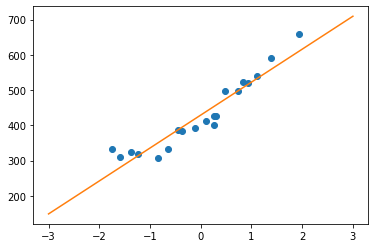

In [13]:
while diff > 1e-2:
    #更新结果一时保存
    tmp_theta0 = theta0 - ETA * np.sum((f(train_z) - train_y))
    tmp_theta1 = theta1 - ETA * np.sum((f(train_z) - train_y) * train_z)
    
    #参数更新
    theta0 = tmp_theta0
    theta1 = tmp_theta1
    
    #跟前回误差的差分计算
    current_error = E(train_z, train_y)
    diff = error-current_error
    error = current_error
    
    #log输出
    count += 1
    log = "{}回:theta0 = {:.3f},theta1 = {:.3f},差分={:.4f}"
    print(log.format(count, theta0, theta1,diff))

#plot确认
x = np.linspace(-3,3,100)
plt.plot(train_z,train_y,'o')
plt.plot(x,f(x))
plt.show()